# Data Cleaning

In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
img = cv2.imread("E:\\Coding\\Image_Classification_Project\\model\\DataSet\\anupama_parameswaran\\actress-anupama-parameswaran-photos-instagram-hd-images-139a63a.jpg")
img.shape

(960, 640, 3)

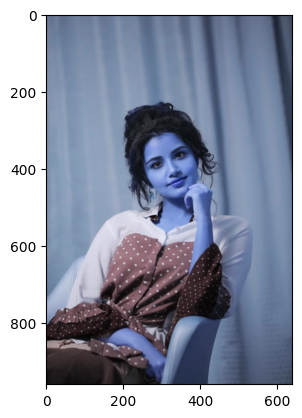

In [4]:
plt.imshow(img)

In [5]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(960, 640)

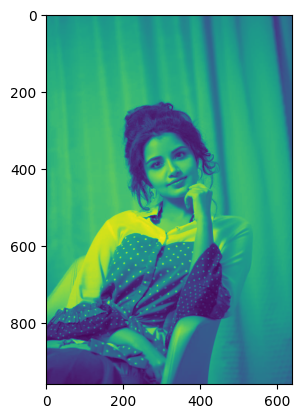

In [6]:
plt.imshow(gray)

In [7]:
face_cascade = cv2.CascadeClassifier("E:\Coding\Image_Classification_Project\model\opencv\haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("E:\Coding\Image_Classification_Project\model\opencv\haarcascade_eye.xml")

faces = face_cascade.detectMultiScale(gray, 1.3, 4)
faces

array([[228, 305, 183, 183]])

In [8]:
(x, y, w, h) = faces[0]
x,y,w,h

(228, 305, 183, 183)

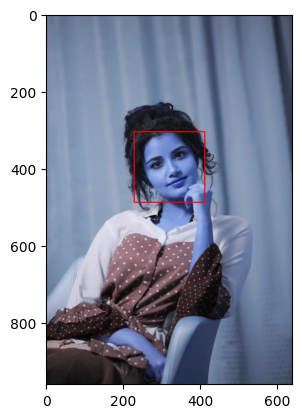

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w, y+h), (255,0,0),2)
plt.imshow(face_img)

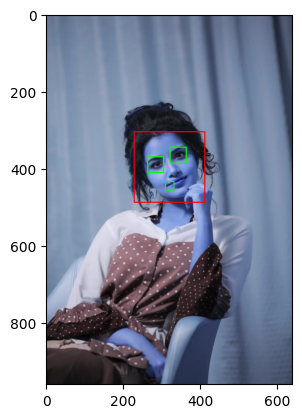

In [10]:
#faces = face_cascade.detectMultiScale(gray, 1.3, 5)
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

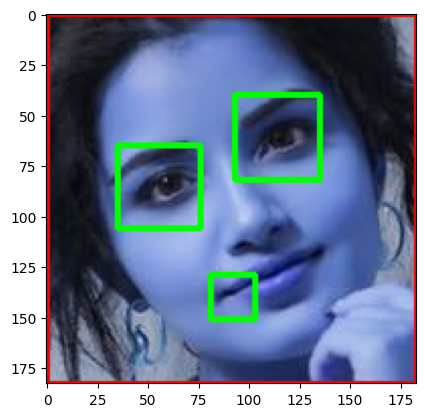

In [11]:
%matplotlib inline
plt.imshow(roi_color, cmap = "gray")

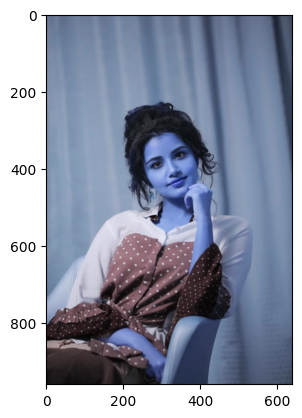

In [13]:
original_image = cv2.imread("E:\\Coding\\Image_Classification_Project\\model\\DataSet\\anupama_parameswaran\\actress-anupama-parameswaran-photos-instagram-hd-images-139a63a.jpg")
plt.imshow(original_image)

In [14]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 4)
   
    for (x,y,w,h) in faces:
        
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes  = eye_cascade.detectMultiScale(roi_gray)
        
        if len(eyes) >= 2:
            return roi_color

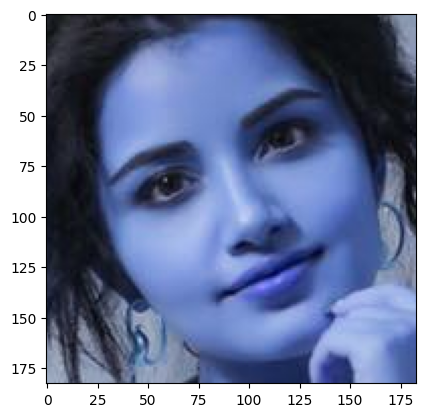

In [15]:
cropped_image = get_cropped_image_if_2_eyes("E:\\Coding\\Image_Classification_Project\\model\\DataSet\\anupama_parameswaran\\actress-anupama-parameswaran-photos-instagram-hd-images-139a63a.jpg")
plt.imshow(cropped_image)

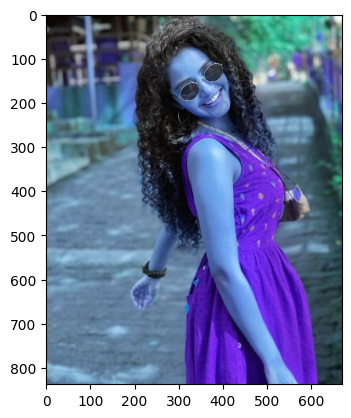

In [16]:
original_image = cv2.imread("E:\\Coding\\Image_Classification_Project\\model\\test_images\\866c13b7438134d4429177c3547951416ee2e.jpg")
plt.imshow(original_image)

In [17]:
cropped_image = get_cropped_image_if_2_eyes("E:\\Coding\\Image_Classification_Project\\model\\test_images\\866c13b7438134d4429177c3547951416ee2e.jpg")
cropped_image

In [34]:
path_to_data = 'E:\\Coding\\Image_Classification_Project\\model\\DataSet\\'
path_to_cr_data = 'E:\\Coding\\Image_Classification_Project\\model\\DataSet\\cropped\\'

In [50]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [51]:
img_dirs

['E:\\Coding\\Image_Classification_Project\\model\\DataSet\\anupama_parameswaran',
 'E:\\Coding\\Image_Classification_Project\\model\\DataSet\\ayli_ghiya',
 'E:\\Coding\\Image_Classification_Project\\model\\DataSet\\chadwick_boseman',
 'E:\\Coding\\Image_Classification_Project\\model\\DataSet\\emma_watson',
 'E:\\Coding\\Image_Classification_Project\\model\\DataSet\\mithila_palkar',
 'E:\\Coding\\Image_Classification_Project\\model\\DataSet\\robert_downey_jr',
 'E:\\Coding\\Image_Classification_Project\\model\\DataSet\\zendaya']

In [52]:
import shutil

if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)

os.mkdir(path_to_cr_data)

In [53]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1 
    celebrity_name = img_dir.split('\\')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ", cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "\\" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1
            

anupama_parameswaran
Generating cropped images in folder:  E:\Coding\Image_Classification_Project\model\DataSet\cropped\anupama_parameswaran
ayli_ghiya
Generating cropped images in folder:  E:\Coding\Image_Classification_Project\model\DataSet\cropped\ayli_ghiya
chadwick_boseman
Generating cropped images in folder:  E:\Coding\Image_Classification_Project\model\DataSet\cropped\chadwick_boseman
emma_watson
Generating cropped images in folder:  E:\Coding\Image_Classification_Project\model\DataSet\cropped\emma_watson
mithila_palkar
Generating cropped images in folder:  E:\Coding\Image_Classification_Project\model\DataSet\cropped\mithila_palkar
robert_downey_jr
Generating cropped images in folder:  E:\Coding\Image_Classification_Project\model\DataSet\cropped\robert_downey_jr
zendaya
Generating cropped images in folder:  E:\Coding\Image_Classification_Project\model\DataSet\cropped\zendaya


In [54]:
import numpy as np
import pywt
import cv2

def w2d(img, mode = "haar", level = 1):
    imArray = img
    
    imArray = cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    
    imArray = np.float32(imArray)
    imArray /=255
    
    coeffs = pywt.wavedec2(imArray, mode, level = level)
    
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0
    
    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

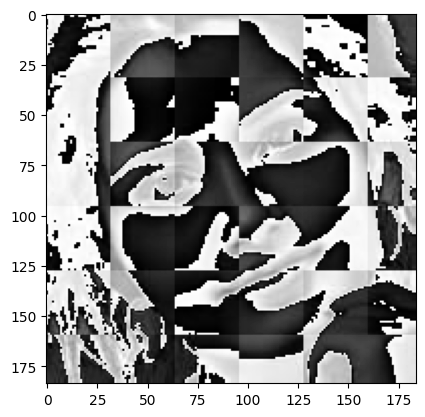

In [56]:
cropped_image = get_cropped_image_if_2_eyes("E:\\Coding\\Image_Classification_Project\\model\\DataSet\\anupama_parameswaran\\actress-anupama-parameswaran-photos-instagram-hd-images-139a63a.jpg")

im_har = w2d(cropped_image, 'db1', 5)
plt.imshow(im_har, cmap= 'gray')

In [57]:
celebrity_file_names_dict

{'anupama_parameswaran': ['E:\\Coding\\Image_Classification_Project\\model\\DataSet\\cropped\\anupama_parameswaran\\anupama_parameswaran1.png',
  'E:\\Coding\\Image_Classification_Project\\model\\DataSet\\cropped\\anupama_parameswaran\\anupama_parameswaran2.png',
  'E:\\Coding\\Image_Classification_Project\\model\\DataSet\\cropped\\anupama_parameswaran\\anupama_parameswaran3.png',
  'E:\\Coding\\Image_Classification_Project\\model\\DataSet\\cropped\\anupama_parameswaran\\anupama_parameswaran4.png',
  'E:\\Coding\\Image_Classification_Project\\model\\DataSet\\cropped\\anupama_parameswaran\\anupama_parameswaran5.png',
  'E:\\Coding\\Image_Classification_Project\\model\\DataSet\\cropped\\anupama_parameswaran\\anupama_parameswaran6.png',
  'E:\\Coding\\Image_Classification_Project\\model\\DataSet\\cropped\\anupama_parameswaran\\anupama_parameswaran7.png',
  'E:\\Coding\\Image_Classification_Project\\model\\DataSet\\cropped\\anupama_parameswaran\\anupama_parameswaran8.png',
  'E:\\Coding\\I

In [58]:
class_dict = {}
count = 0

for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1

class_dict

{'anupama_parameswaran': 0,
 'ayli_ghiya': 1,
 'chadwick_boseman': 2,
 'emma_watson': 3,
 'mithila_palkar': 4,
 'robert_downey_jr': 5,
 'zendaya': 6}

In [59]:
X=[]
y=[]

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32,32))
        img_har = w2d(img, 'db1', 5)
        scalled_img_har = cv2.resize(img_har, (32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3 , 1), scalled_img_har.reshape(32*32, 1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [60]:
32*32*3 + 32*32

4096

In [61]:
len(X[0])

4096

In [62]:
X[0]

array([[ 73],
       [ 93],
       [160],
       ...,
       [ 71],
       [ 62],
       [  4]], dtype=uint8)

In [63]:
X = np.array(X).reshape(len(X), 4096).astype(float)
X.shape

(1463, 4096)

# Training a model (Data Training)

Training with SVM model

In [64]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
pipe = Pipeline([('scalar', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7404371584699454

In [68]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.29      0.43        31
           1       0.55      0.65      0.59        17
           2       0.83      0.87      0.85        68
           3       0.75      0.82      0.78        61
           4       0.71      0.69      0.70        49
           5       0.71      0.74      0.72        68
           6       0.73      0.81      0.77        72

    accuracy                           0.74       366
   macro avg       0.73      0.69      0.69       366
weighted avg       0.75      0.74      0.73       366



# GridSearchCV
### To select model that performs best

In [69]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [70]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma = 'auto', probability = True),
        'params': {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf', 'linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class = 'auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [71]:
scores = []
best_estimators = {}

import pandas as pd

for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores,columns = ['model', 'best_score', 'best_params'])
df

,model,best_score,best_params
0,svm,0.717426,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.483138,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.654516,{'logisticregression__C': 1}


In [72]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=10, gamma='auto', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [73]:
best_estimators['svm'].score(X_test, y_test)

0.7404371584699454

In [74]:
best_estimators['random_forest'].score(X_test, y_test)

0.48633879781420764

In [75]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.6967213114754098

In [76]:
best_clf = best_estimators['svm']

In [77]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 9,  7,  3,  3,  4,  1,  4],
       [ 1, 11,  1,  1,  2,  1,  0],
       [ 0,  0, 59,  1,  0,  8,  0],
       [ 0,  0,  1, 50,  0,  4,  6],
       [ 1,  0,  2,  5, 34,  3,  4],
       [ 0,  0,  2,  7,  2, 50,  7],
       [ 0,  2,  3,  0,  6,  3, 58]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

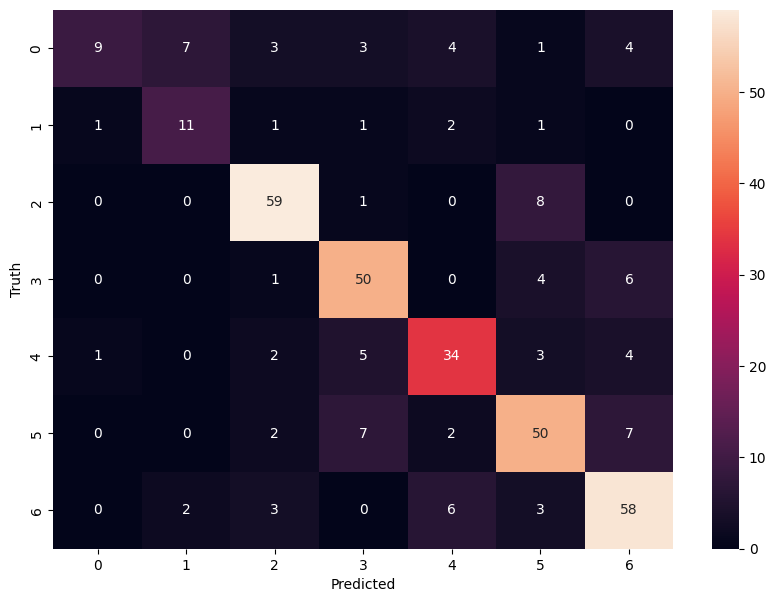

In [78]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [79]:
class_dict

{'anupama_parameswaran': 0,
 'ayli_ghiya': 1,
 'chadwick_boseman': 2,
 'emma_watson': 3,
 'mithila_palkar': 4,
 'robert_downey_jr': 5,
 'zendaya': 6}

# Saving trained model

In [80]:
!pip install joblib
import joblib

joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

# Save Class dict

In [81]:
import json
with open("class_dictionary.json", 'w') as f:
    f.write(json.dumps(class_dict))